<center>

# **When Ronald meets data McDonald**


## Uvod u podatkovnu znanost
##### Karla Kalajžić & Mia Kalaica
</center>

Danas je McDonald's jedan od najvećih svjetskih lanaca restorana koji poslužuje oko 68 milijuna kupaca u 120 zemalja i u približno 36.899 prodajnih mjesta. Ako bilo koga pitate što misli o McDonald's-u, standardni odgovor bi bio da ga voli, ali zna da to ne bi trebao često jesti. Tom slijedi da je McDonald's svima poznat kao nezdrav.

Problem koji mi imamo s gornjom tezom jest da, naravno, ako pojedemo tri burgera dnevno, naše će se zdravlje drastično urušiti, ali zar isto ne vrijedi za svaki drugi restoran?


Ono što vam mi namjeravamo utvrditi jest postoji li optimalna kombinacija stavki s McDonald's jelovnika koja točno slijedi prehrambene smjernice i koja će biti zdrava na temelju dnevnog nutrirtivnog unosa. Je li moguće uživati u hrani bez nepotrenog odricanja?

**Kako bi izgledao McHealthy Combo? Pogledat ćemo u nastavku.**

# **1. Prosječan dnevni unos nutritivnih vrijednosti**
>Prvi korak je bio pronaći vjerodostojan izvor s podacima koji nam govore što sadrži dnevna zdrava dijeta

Detaljnijim proučavanjem pronašle smo nutrirtivne vrijednosti dane od strane NHS-a. Prema njima, osnovni dnevni unos prosječne osobe je:

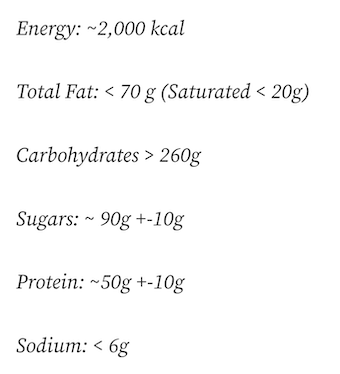

Sada kad imamo osnovne podatke kojima se vodimo, krećemo na McDonald's.

**Who’s hungry… FOR THE TRUTH! :)**

# **2. Meet the Data**
>Kao drugi korak ulazimo u detalje o podacima nad kojima radimo

###Import potrebnih biblioteka

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil
import plotly.express as px

###Load and check data
> Učitavamo naš dataset unutar pandas data frame object-a:

Dalje je bilo važno pronaći podatke o jelovniku McDonald’s-a. Nasreću, vrlo brzo nam problem dataseta rješava Kaggle. Dataset uključuje broj kalorija, vrstu hrane (piće, hamburger itd.) i sve makronutrijente poput sadržaja natrija i masti.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
menu = pd.read_csv("drive/MyDrive/Mcdonald.csv")

###Brzi pregled McDonald's dataseta

Kako bismo razumjele naše podatke trebale smo baciti pogled s kojim varijablama radimo, kako su vrijednosti strukturirane na temelju stupca u kojima se nalaze, koja je naša veličina podataka, max vrijednosti kojima raspolažemo po stupcima i sl.




In [ ]:
#Veličina tablice dataseta
menu.shape

(260, 24)

In [ ]:
#Stupci
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [ ]:
#Unique vrijednosti za svaki stupca
menu.nunique()

Category                           9
Item                             260
Serving Size                     107
Calories                          78
Calories from Fat                 48
Total Fat                         52
Total Fat (% Daily Value)         63
Saturated Fat                     26
Saturated Fat (% Daily Value)     74
Trans Fat                          5
Cholesterol                       35
Cholesterol (% Daily Value)       48
Sodium                           111
Sodium (% Daily Value)            65
Carbohydrates                     84
Carbohydrates (% Daily Value)     40
Dietary Fiber                      8
Dietary Fiber (% Daily Value)     24
Sugars                            83
Protein                           42
Vitamin A (% Daily Value)         19
Vitamin C (% Daily Value)         17
Calcium (% Daily Value)           16
Iron (% Daily Value)              12
dtype: int64

In [ ]:
#Broj stupaca, imena stupaca, data types stupaca, korištena memorija, range index i broj čelija unutar svakog stupca (non-null values)
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
#Opis podataka iz DataFrame-a (broj non-empty vrijednosti, aritmetička sredina, standardna devijacija, min, max i sl.)
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
#Standardna devijacija duž zadanog stupca
menu.std()

<ipython-input-9-0e55abdc7e3b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  menu.std()


Calories                         240.269886
Calories from Fat                127.875914
Total Fat                         14.205998
Total Fat (% Daily Value)         21.885199
Saturated Fat                      5.321873
Saturated Fat (% Daily Value)     26.639209
Trans Fat                          0.429133
Cholesterol                       87.269257
Cholesterol (% Daily Value)       29.091653
Sodium                           577.026323
Sodium (% Daily Value)            24.034954
Carbohydrates                     28.252232
Carbohydrates (% Daily Value)      9.419544
Dietary Fiber                      1.567717
Dietary Fiber (% Daily Value)      6.307057
Sugars                            28.679797
Protein                           11.426146
Vitamin A (% Daily Value)         24.366381
Vitamin C (% Daily Value)         26.345542
Calcium (% Daily Value)           17.019953
Iron (% Daily Value)               8.723263
dtype: float64

In [ ]:
#Najveće vrijednosti koje se nalaze unutar zadanih stupaca
max_values = menu[['Calories','Total Fat','Carbohydrates','Dietary Fiber','Sugars','Protein','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']].max()
print(max_values)

Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64


Prema sažetku skupa podataka, maksimalna vrijednost za kalorije i druge varijable čini se dosta visokom.

In [ ]:
#Print prvih i zadnjih pet redaka dataseta
menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
menu.tail(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


###Čišćenje podataka
>Korak smo bliže analizi. Još samo data cleaning i tu smo!

Dio čišćenja koda jednostavno nam je dao pogled distribucije vrijednosti koje nedostaju u skupu podataka, kako bismo dobile dobru predodžbu o tome s kojim stupcima moramo raditi da bismo riješile problem vrijednosti koje nedostaju.

Neki od mogućih problema na koje smo mogle naići da nismo pročistile podatke:

*   Stupci nemaju vrijednosti

*   Postoje 2 stupca s više različitih riječi spojenih zarezom
*   Ostali stupci potencijalno mogu imati nedostajuće vrijednosti


In [ ]:
#Način provjere koji stupci imaju nedostajuće vrijednosti i koliko podataka nedostaje (True za NULL vrijednosti, inače False)
menu.isnull()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print('Menu nulls:', menu.isnull().sum().sum())

Menu nulls: 0



Kao što možemo vidjeti, nema nedostajućih vrijednosti, dataset je dobar.

#**3. Analiza McDonald's data**
>Trećim korakom korčamo prema analizi dataseta

###Prikaz prosječnog broja artikala za svaku kategoriju
>McDonald's ima 9 kategorija u jelovniku od 260 različitih stavki





*   Coffee & Tea

*   Breakfast

*   Smoothies & Shakes

*   Chicken & Fish
*   Beverages


*   Beef & Pork


*  Snacks & Sides


*  Desserts

*   Salads

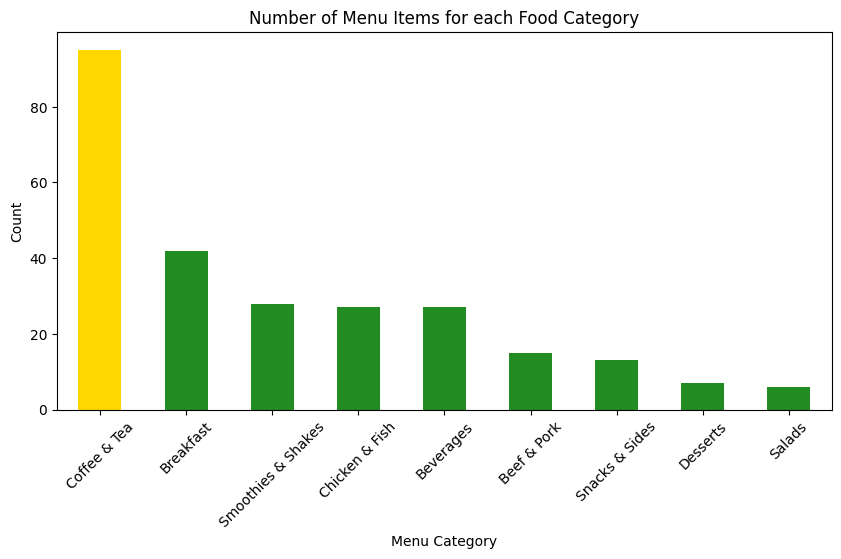

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
menu_category = menu.Category.value_counts()
menu_category.plot.bar(color = ['gold','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen','forestgreen'])
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Count")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show()

Većina McDonald's-ovog jelovnika spada u kategoriju 'Coffee & Tea'. Kategorija s najmanje artikala je 'Salads'.

###Prikaz prosječnog broja nutritivnih vrijednosti za svaku kategoriju

**seaborn.stripplot dijagram**
>Jednoosni dijagram raspršenosti koji se koristi za vizualizaciju distribucije mnogih pojedinačnih jednodimenzionalnih vrijednosti. Vrijednosti se iscrtavaju kao točke duž jedne jedinstvene osi, a točke s istom vrijednošću mogu se preklapati.




U našem slučaju stripplot dijagramom prikazujemo koliko se kojih nutritivnih vrijednosti **otprilike** nalazi unutar gore definiranih 9 kategorija.

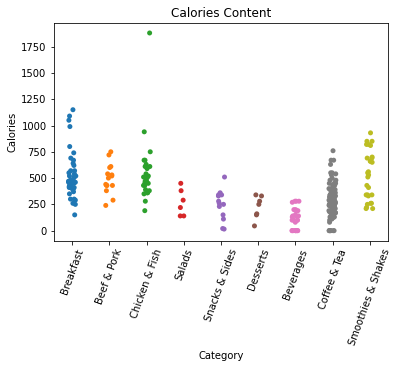

In [ ]:
#Kalorije vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Calories', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Calories Content')
plt.show()

Najveća vrijednost kalorija unutar kategorije 'Chicken & Fish', ali najveća količina unutar kategorije 'Breakfast'.

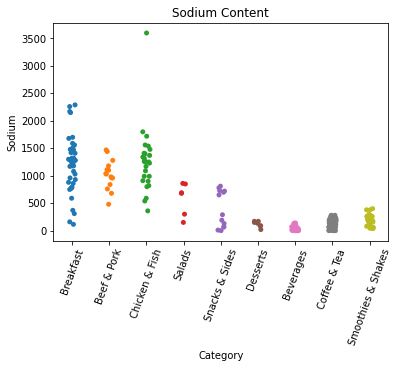

In [ ]:
#Natrij vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Sodium', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

Najveća vrijednost natrija unutar kategorije 'Chicken & Fish', ali najveća količina unutar kategorije 'Breakfast'.

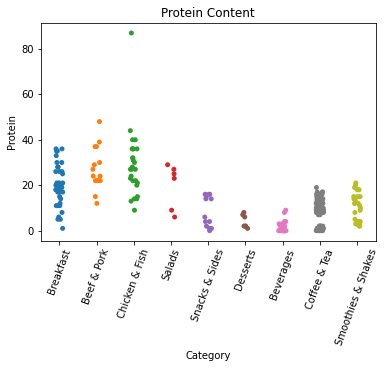

In [ ]:
#Proteini vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Protein', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Protein Content')
plt.show()

Najveća vrijednost proteina unutar kategorije 'Chicken & Fish', ali najveća količina unutar kategorije 'Breakfast'.

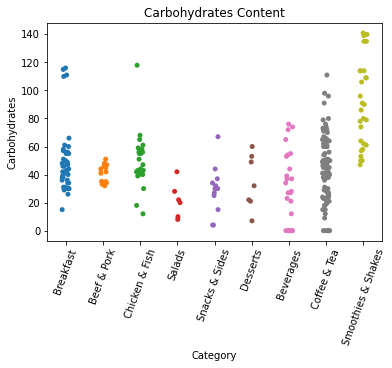

In [ ]:
#Ugljikohidrati vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Carbohydrates', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Carbohydrates Content')
plt.show()

Najveća vrijednost ugljikohidrata unutar kategorije 'Smoothies & Shakes', ali najveća količina unutar kategorije 'Coffee & Tea'.

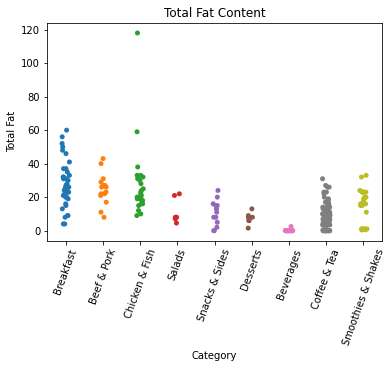

In [ ]:
#Ukupne masti vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Total Fat', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Total Fat Content')
plt.show()

Najveća vrijednost ukupnih masti unutar kategorije 'Chicken & Fish', ali najveća količina unutar kategorije 'Breakfast'.

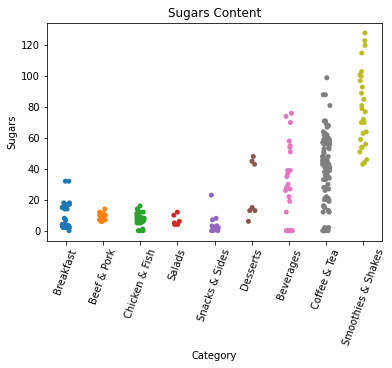

In [ ]:
#Šećeri vs Kategorije
from pandas.core.util.numba_ import maybe_use_numba

plot=sns.stripplot(x="Category", y='Sugars', data=menu)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sugars Content')
plt.show()

Najveća vrijednost šečera unutar kategorije 'Smoothies & Shakes', ali najveća količina unutar kategorije 'Coffee & Tea'.

###Maksimalne vrijednosti

**idxmax()**

>Metoda korisna za lociranje specifičnih podatkovnih točaka. Može se koristiti za pronalaženje podataka koji odgovaraju maksimalnoj vrijednosti.

U našem slučaju, koji artikli imaju najveću vrijednost određene nutritivne vrijednosti.

In [ ]:
#Natrij
menu['Sodium'].idxmax()

82

In [ ]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [ ]:
#Ukupne masti
menu['Total Fat'].idxmax()

82

In [ ]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [ ]:
#Trans masti
menu['Trans Fat'].idxmax()

47

In [ ]:
menu.at[47, 'Item']

'Double Quarter Pounder with Cheese'

In [ ]:
#Proteini
menu['Protein'].idxmax()

82

In [ ]:
menu.at[82, 'Item']

'Chicken McNuggets (40 piece)'

In [ ]:
#Ugljikohidrati
menu['Carbohydrates'].idxmax()

249

In [ ]:
menu.at[249, 'Item']

'Chocolate Shake (Large)'

In [ ]:
#Kolesterol
menu['Cholesterol'].idxmax()

31

In [ ]:
menu.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

In [ ]:
#Šećeri
menu['Sugars'].idxmax()

253

In [ ]:
menu.at[253, 'Item']

'McFlurry with M&M’s Candies (Medium)'

>Dodatno

In [ ]:
#Vitamin A
menu['Vitamin A (% Daily Value)'].idxmax()

84

In [ ]:
menu.at[84, 'Item']

'Premium Bacon Ranch Salad (without Chicken)'

In [ ]:
#Vitamin C
menu['Vitamin C (% Daily Value)'].idxmax()

135

In [ ]:
menu.at[135, 'Item']

'Minute Maid Orange Juice (Large)'

In [ ]:
#Kalcij
menu['Calcium (% Daily Value)'].idxmax()

246

In [ ]:
menu.at[246, 'Item']

'Strawberry Shake (Large)'

In [ ]:
#Željezo
menu['Iron (% Daily Value)'].idxmax()

31

In [ ]:
menu.at[31, 'Item']

'Big Breakfast with Hotcakes (Regular Biscuit)'

###Analiza nutritivnih vrijednosti

>Dolazimo do koraka gdje je prikazana analiza nutritivnih vrijednosti, njihove muđusobne ovisnosti i dr.

####Kalorije

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima kalorija
menu['Calories'].mean()

368.2692307692308

In [ ]:
menu.groupby('Category')['Calories'].mean()

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64

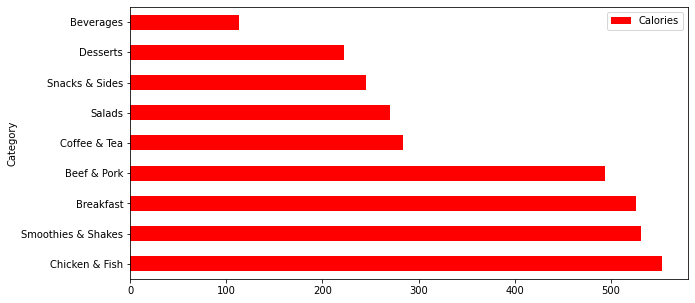

In [ ]:
#Koje kategorije imaju najviše kalorija
menu[ ['Category', 'Calories'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Calories', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'calories': 'calories'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5),color='red')

Iznenađujuće je vidjeti doručak pri vrhu, ali razlog tom bi mogao biti da 'Breakfast' uključuje artikle poput palačinki i krafni koje bi mogle podići prosjek.

Chicken McNuggets (40) također je bio najkaloričniji komad na jelovniku, kao što smo prethodno vidjeli, što dovodi do kategorije 'Chicken & Fish' kao najkaloričnije.

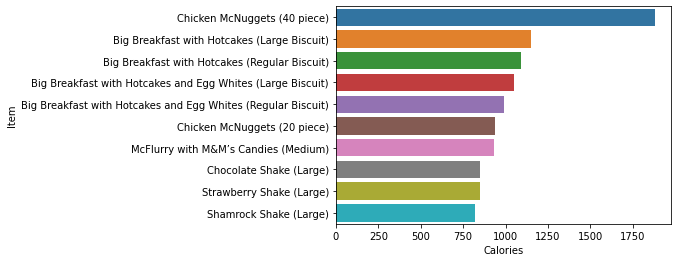

In [ ]:
#Koji artikli imaju najviše kalorija
data_calory = menu.sort_values(by = ['Calories'], ascending=False)
sns.barplot(y="Item", x="Calories", data = data_calory.head(10))

Ovim još jednom potvrđujemo da je Chicken McNuggets (40) najkaloričniji artikl, a time i zašto kategorija 'Chicken & Fish' ima najveći broj kalorija.

######Prosječna količina kalorija svakog artikla unutar svoje kategorije

Informativno smo prikazale ove vrijednosti iz razloga što su neke od najkaloričnijih artikala zadnje na koje bismo posumnjali. Tako npr. možemo vidjeti unutar kategorije 'Smoothies & Shakes', uz sve smoothise i shakove, to je upravo McFlurry M'Ms sladoled koji je jedan od najprodavanijih.

In [ ]:
lists=["Beef & Pork","Chicken & Fish","Beverages","Snacks & Sides","Desserts",
      "Breakfast","Smoothies & Shakes"]

1 . Beef & Pork


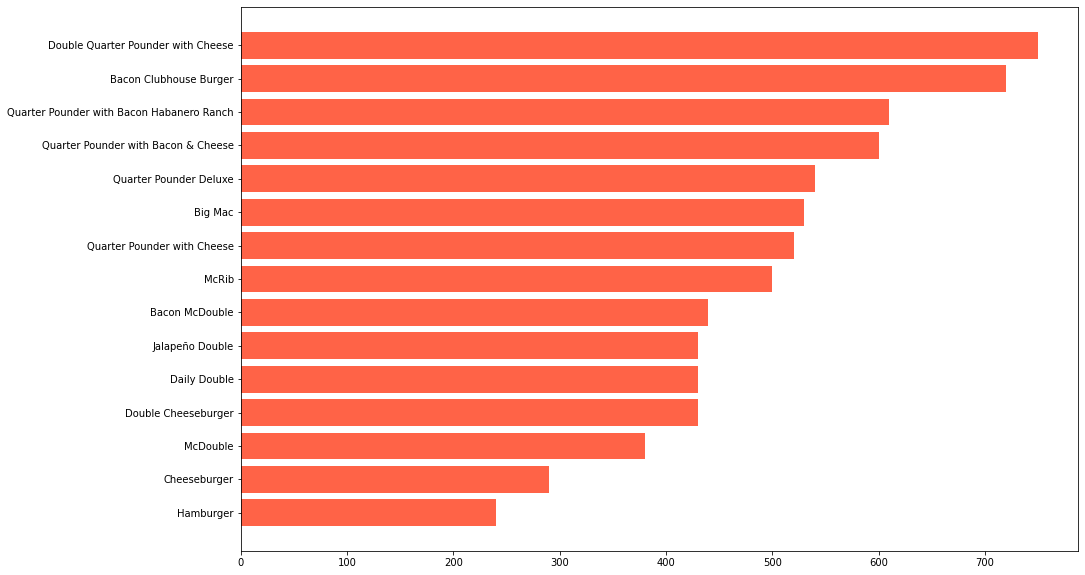

2 . Chicken & Fish


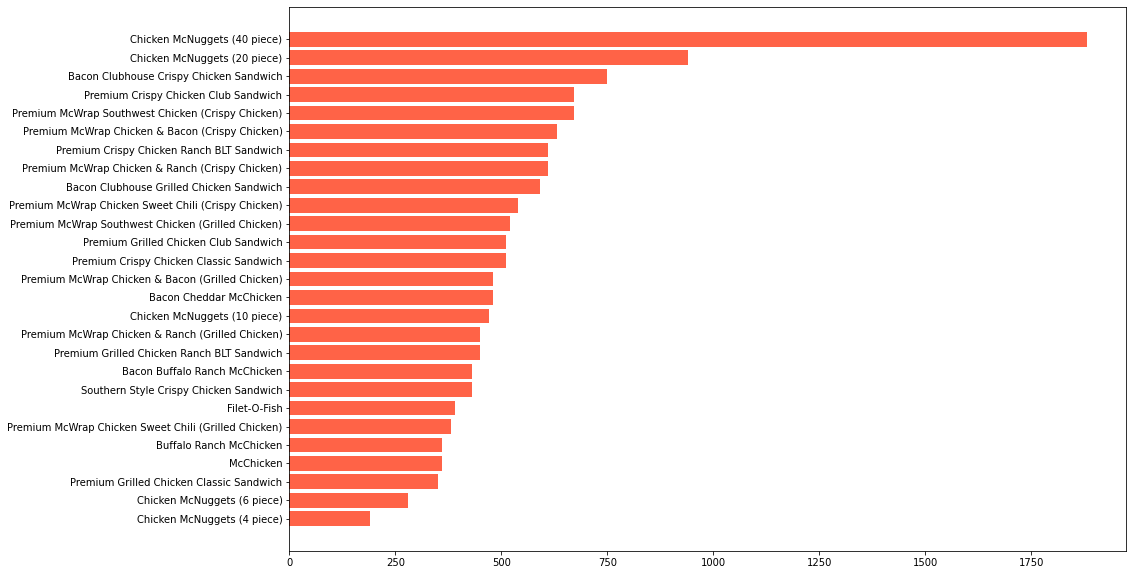

3 . Beverages


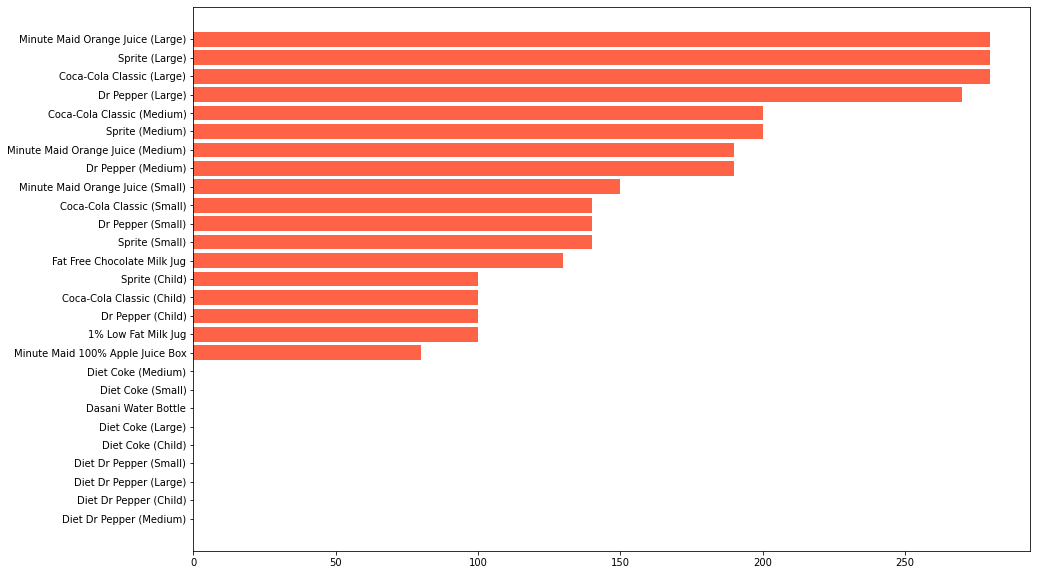

4 . Snacks & Sides


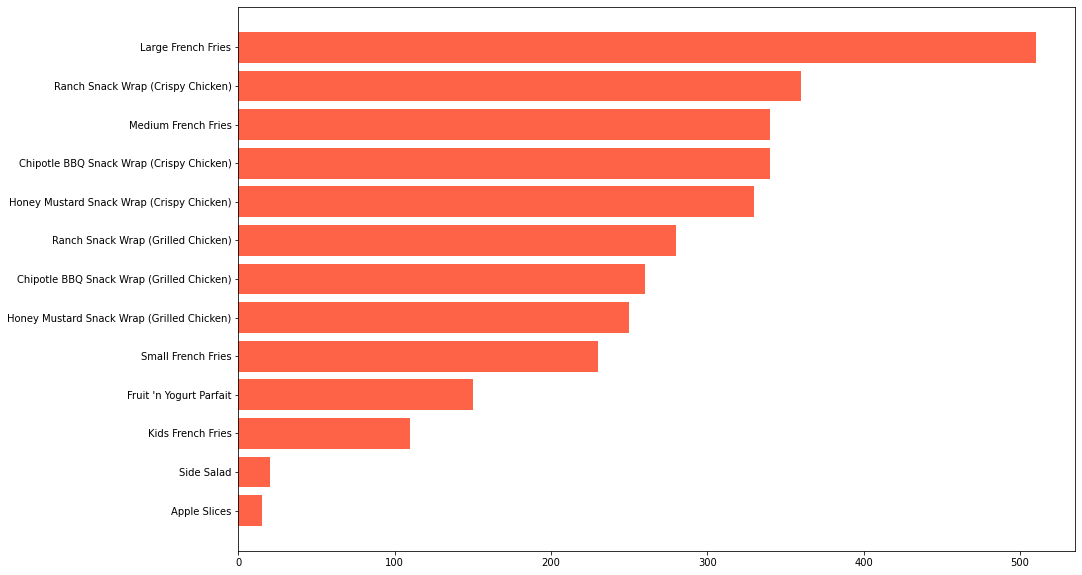

5 . Desserts


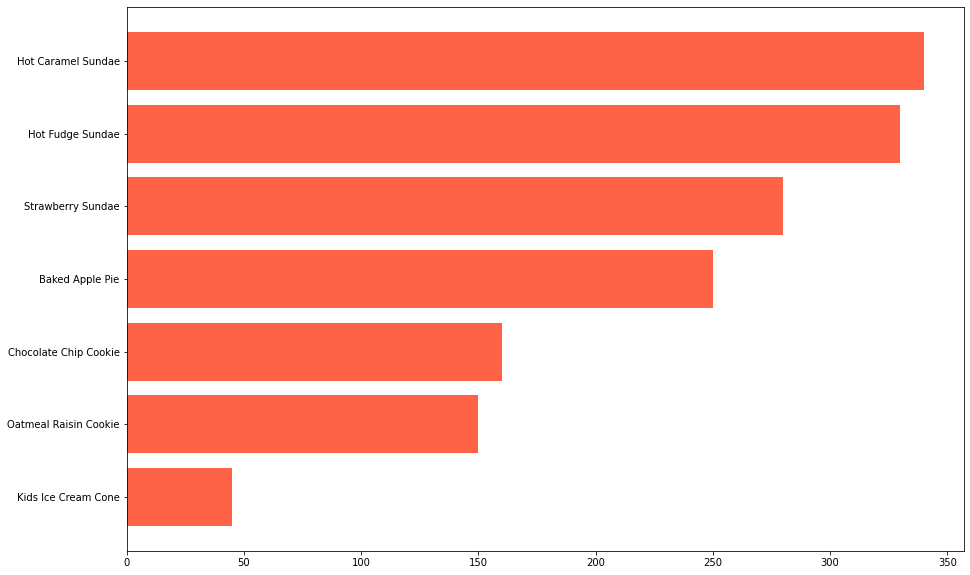

6 . Breakfast


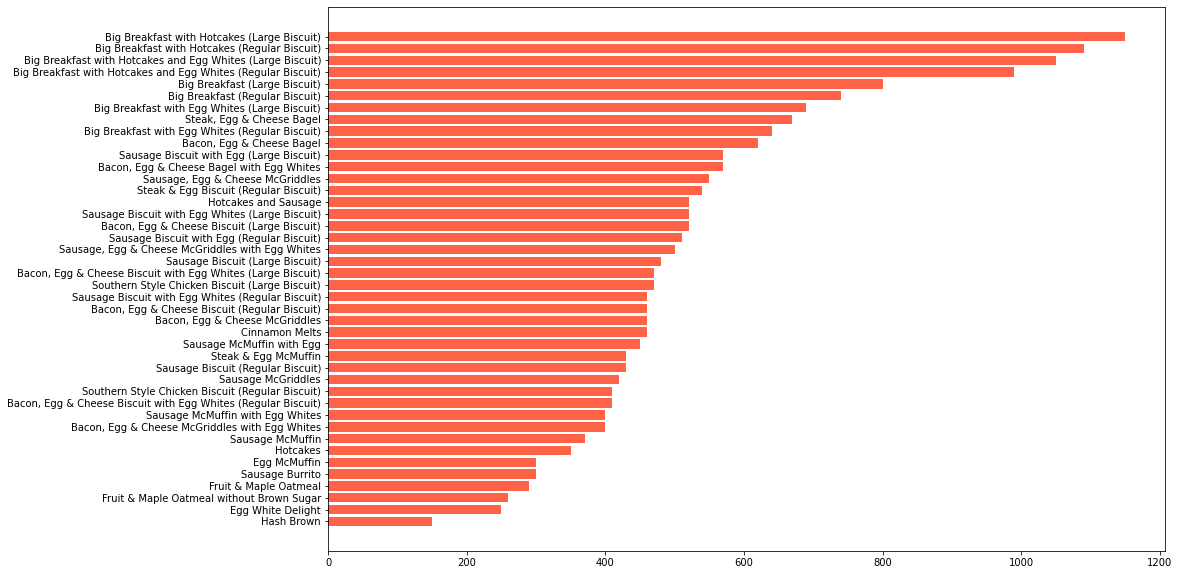

7 . Smoothies & Shakes


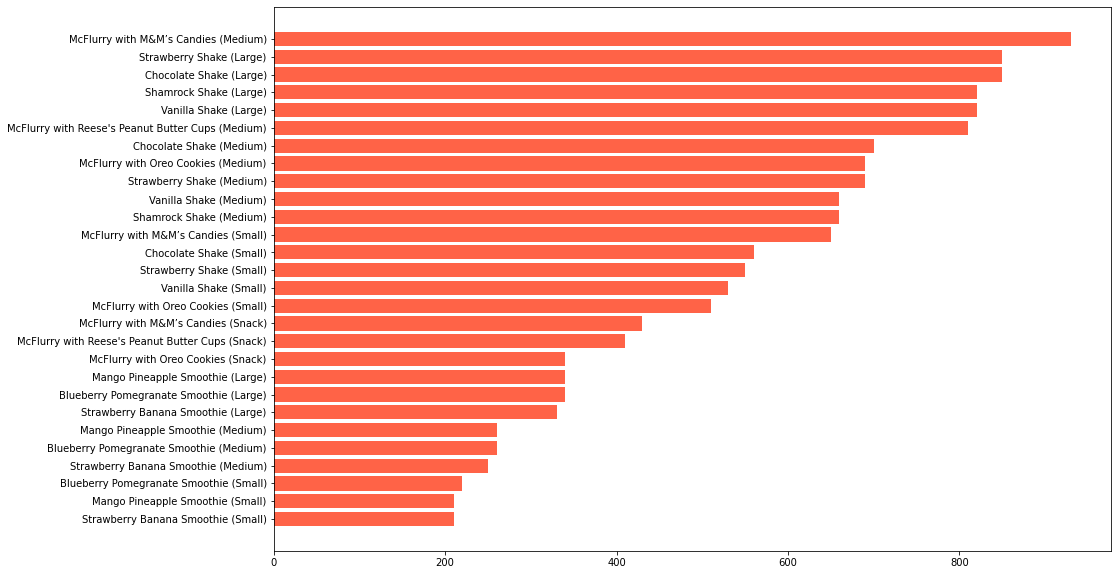

In [ ]:
for list in lists:

    items=menu.query('Category == list').sort_values(by="Calories", ascending=False)
    items_custom=items.iloc[:,[1,3,5]]

    items_t=menu.query('Category == list').sort_values(by="Calories", ascending=True)
    items_custom_t=items_t.iloc[:,[1,3,5]]

    print(lists.index(list)+1,".",list)

    fig,ax=plt.subplots(figsize=(15, 10))
    x=items_custom_t.iloc[:,0]
    y=items_custom_t.iloc[:,1]
    ax.barh(x,y, tick_label=x, color='tomato')
    plt.show()

######Calories and Calories from Fat

Za prikaz kalorija i kalorija iz masti odabrale smo scatter plot dijagram, kako bismo mogle prikazati međusobnu ovisnost jednog elementa o drugom.

In [ ]:
mapping_dict = {'Breakfast': 0, 'Beef & Pork': 1, 'Chicken & Fish': 2, 'Salads': 3, 'Snacks & Sides': 4, 'Desserts': 5, 'Coffee & Tea': 6, 'Smoothies & Shakes': 6}

In [ ]:
menu['category'] = menu.Category.map(mapping_dict)
menu[['Category', 'category']]

,Category,category
0,Breakfast,0.0
1,Breakfast,0.0
2,Breakfast,0.0
3,Breakfast,0.0
4,Breakfast,0.0
...,...,...
255,Smoothies & Shakes,6.0
256,Smoothies & Shakes,6.0
257,Smoothies & Shakes,6.0
258,Smoothies & Shakes,6.0


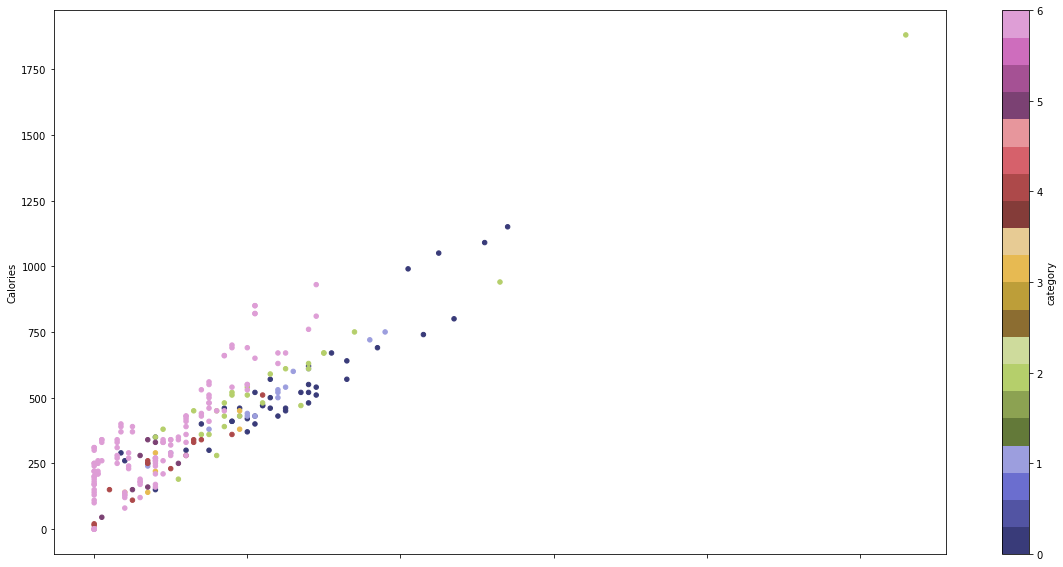

In [ ]:
menu.plot(kind='scatter', x='Calories from Fat', y='Calories', figsize=(20, 10), s=20, c='category', colormap='tab20b');

Možemo vidjeti da postoji dosta jaka veza između kalorija i kalorija iz masti. Analogno tome, artikli s visokim udjelom kalorija imaju ujedno i visoki udio kalorija iz masti.

####Šećeri


In [ ]:
#Koliko u prosjeku hrana s jelovnika ima šećera
menu['Sugars'].mean()

29.423076923076923

In [ ]:
menu.groupby('Category')['Sugars'].mean()

Category
Beef & Pork            8.800000
Beverages             27.851852
Breakfast              8.261905
Chicken & Fish         7.333333
Coffee & Tea          39.610526
Desserts              26.142857
Salads                 6.833333
Smoothies & Shakes    77.892857
Snacks & Sides         4.076923
Name: Sugars, dtype: float64

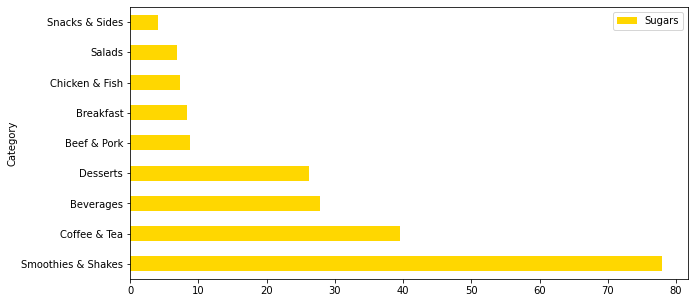

In [ ]:
#Koje kategorije imaju najviše šećera
menu[ ['Category', 'Sugars'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Sugars', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'sugars': 'Sugars Avg'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5), color= {'gold'})

Kao što možemo vidjeti, šećeri ipak znatno premašuju dnevnu vrijednost u nekim slučajevima.

'Coffee & Tea' i 'Smoothies & Shakes' posebno premašuju dnevni unos šećera što predstavlja brigu za zdravlje.

Zanimljivo je da gledajući šećere, kategorije 'Breakfast', 'Chicken & Fish' i 'Beef & Pork' izgledaju relativno zdravo!

Artikli s najmanje šećera nalaze se unutar 'Snack & Sides' što je i očekivano.

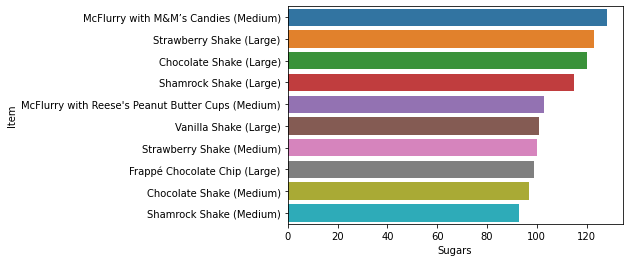

In [ ]:
#Koji artikli imaju najviše šećera
data_sugars = menu.sort_values(by = ['Sugars'], ascending=False)
sns.barplot(y="Item", x="Sugars", data = data_sugars.head(10))

Kao što se moglo očekivati, najkaloričniji McFlurry M&M's je ujedno i artikl s najviše šećera. Gledajući i ostale artikle, vidimo da su svi iz kategorije 'Smoothies & Shakes', čim smo potvrdili i gornje prikazani graf.

Ako se optimalno može pojesti do 90 grama šećera dnevno, ovdje je dan prikaz sve hrane koja ima ispod 90 g šecera:

In [ ]:
menu[menu['Sugars'] < 90 ].head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),category
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0.0


####Proteini

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima proteina
menu['Protein'].mean()

13.338461538461539

In [ ]:
menu.groupby('Category')['Protein'].mean()

Category
Beef & Pork           27.333333
Beverages              1.333333
Breakfast             19.857143
Chicken & Fish        29.111111
Coffee & Tea           8.863158
Desserts               4.000000
Salads                19.833333
Smoothies & Shakes    10.857143
Snacks & Sides         8.384615
Name: Protein, dtype: float64

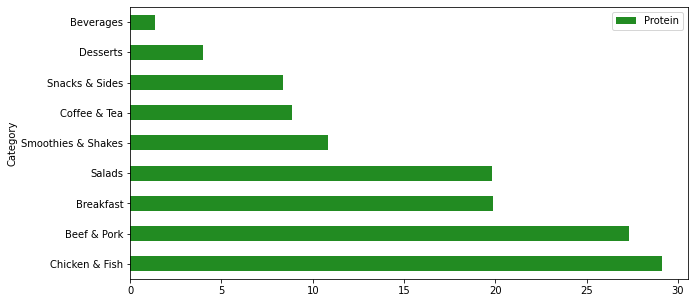

In [ ]:
#Koje kategorije imaju najviše proteina
menu[ ['Category', 'Protein'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Protein', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'protein': 'Protein G'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5), color='forestgreen')

Hrana, koje bi mogla biti češća opcija za večeru ili ručak ('Chicken & Fish' i 'Beef & Pork'), u prosjeku ima više proteina u usporedbi s opcijom za doručak ('Breakfast') i ostalim kategorijama. To bi se moglo gledati kao pozitivno! Naravno, ne čini ju to nužno uvijek zdravijom opcijom.

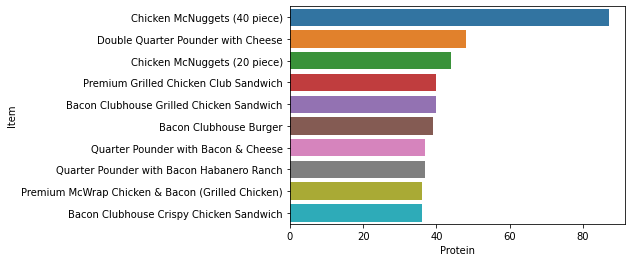

In [ ]:
#Koji artikli imaju najviše proteina
data_Protein = menu.sort_values(by = ['Protein'], ascending=False)
sns.barplot(y="Item", x="Protein", data = data_Protein.head(10))

Očekivano, kategorija 'Chicken & Fish' koja ima najviše proteina, ujedno sadrži i artikl s najviše proteina-'Chicken McNuggets (40)'.

Ako se optimalno može pojesti do 50 grama proteina dnevno, ovdje je dan prikaz sve hrane koja ima ispod 50 g proteina:

In [ ]:
menu[menu['Protein'] < 50 ].head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),category
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0.0


####Masti

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima ukupne masti
menu['Total Fat'].mean()

14.165384615384616

In [ ]:
menu.groupby('Category')['Total Fat'].mean()

Category
Beef & Pork           24.866667
Beverages              0.092593
Breakfast             27.690476
Chicken & Fish        26.962963
Coffee & Tea           8.021053
Desserts               7.357143
Salads                11.750000
Smoothies & Shakes    14.125000
Snacks & Sides        10.538462
Name: Total Fat, dtype: float64

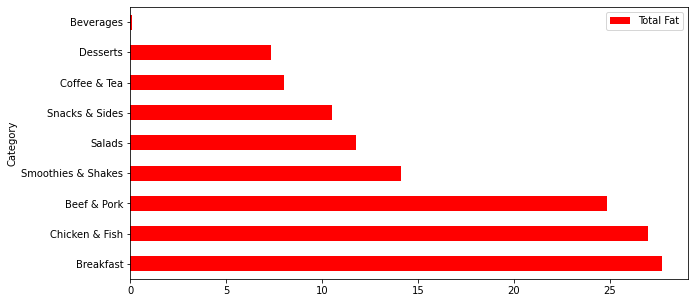

In [ ]:
#Koje kategorije imaju najviše ukupne masti
menu[ ['Category', 'Total Fat'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Total Fat', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Total fat': 'Average Total Fat'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5), color='red')

Ponovno jako iznenađujuće, kategorija 'Breakfast' ima najveću količinu ukupne masti.

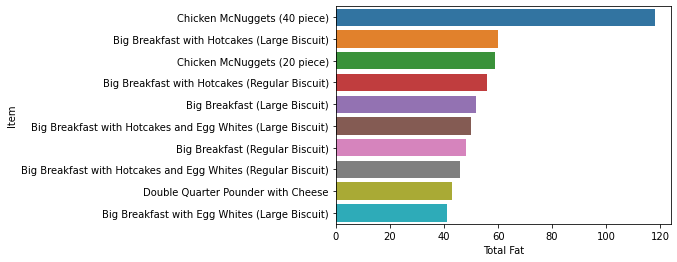

In [ ]:
#Koji artikli imaju najviše ukupne masti
data_fattot = menu.sort_values(by = ['Total Fat'], ascending=False)
sns.barplot(y="Item", x='Total Fat', data = data_fattot.head(10))

Artikal 'Chicken McNuggets (40)' ima značajno veći udio ukupne masti u odnosu na ostatak artikala. Međutim, primjećujemo da gotovo svi ostali artikli s velikom količinom ukupne masti, upadaju u grupu 'Breakfast'. Tim potvrđujemo još jednom da je upravo ta kategorija, kategorija s najviše ukupne masti.

Ako se optimalno može pojesti do 70 grama ukupne masti dnevno, ovdje je dan prikaz sve hrane koja ima ispod 70 g ukupne masti:

In [ ]:
menu[menu['Total Fat'] < 70 ].head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),category
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,0.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,0.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,0.0


#####Vrste Total Fat

>S obzirom na brojna provedena istraživanja, nije nužno dobro promovirati potpuno izbjegavanje svih masti. Važno je napomenuti da su zdrave masti ne samo korisne, već i neophodne za zdravlje. Općenito, ne postoji odnos između postotka kalorija iz masnoća i velike opasnosti po zdravlje.

Masti možemo podijeliti u tri kategorije:

1.   Zasićene masti (Saturated Fat) - Nisu toliko štetne koliko trans masti, ali mogu biti štetne ako se ne uzimaju umjereno

2.   Trans masti (Trans Fat) - To su loše masti i povećavaju rizik od bolesti čak i kada se konzumiraju u malim količinama
3.   Nezasićene masti (Unsaturated Fats) - Ova kategorija masti dobra je za zdravlje i ima manji rizik od bolesti

U sklopu našeg istraživanja u nastavku su samo negativne masti i njihov udio.



######Trans Fat

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima trans masti po kategorijama
menu.groupby('Category')['Trans Fat'].mean()

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

Odmah primjećujemo da McDonald's hrana prema kategorijama ima mali udio trans masti, što je jako dobro.

######Saturated Fat

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima zasićenih masti po kategorijama
menu.groupby('Category')['Saturated Fat'].mean()

Category
Beef & Pork           10.466667
Beverages              0.055556
Breakfast             10.654762
Chicken & Fish         6.166667
Coffee & Tea           4.921053
Desserts               4.285714
Salads                 3.750000
Smoothies & Shakes     8.375000
Snacks & Sides         2.692308
Name: Saturated Fat, dtype: float64

U odnosu na trans masti, udio zasićenih masti po kategorijama je znatno veći.

>Istraživanja sugeriraju da konzumiranje previše zasićenih masti sprječava dobar rad receptora koji razgrađuju kolesterol u jetri. Kolesterol se tako nakuplja u krvi i izaziva razne bolesti.

S obzirom na to, u nastavku je bilo zanimljivo promotriti vrijednosti kolesterola s obzirom na zasićene masti.

In [ ]:
#Nova kategorija saturated_cholesterol, kako bismo točno dobile vrijednosti kolesterola s obzirom na zasićene masti.
menu['saturated_cholesterol'] = menu['Saturated Fat']/menu['Cholesterol']*100

In [ ]:
saturated_cholesterol = menu.groupby('Category')['saturated_cholesterol'].mean().dropna().nlargest(5)

In [ ]:
#saturated_cholesterol s obzirom na pojedine kategorije
coffee_tea = menu[menu.Category == 'Coffee & Tea']
coffee_tea.groupby('Item')['saturated_cholesterol'].mean().sort_values(ascending=False)

Item
Frappé Chocolate Chip (Small)     21.538462
Frappé Chocolate Chip (Medium)    21.250000
Frappé Chocolate Chip (Large)     21.052632
Hazelnut Iced Coffee (Small)      20.000000
Hazelnut Latte (Medium)           20.000000
                                    ...    
Iced Tea (Small)                        NaN
Sweet Tea (Child)                       NaN
Sweet Tea (Large)                       NaN
Sweet Tea (Medium)                      NaN
Sweet Tea (Small)                       NaN
Name: saturated_cholesterol, Length: 95, dtype: float64

Obični čaj i kava ne sadrže saturated_cholesterol, dok pića kao frapei, latte kava i ostalo, imaju visok udio.

In [ ]:
shakes = menu[menu.Category == 'Smoothies & Shakes']
shakes.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Blueberry Pomegranate Smoothie (Medium)               0.000000
Blueberry Pomegranate Smoothie (Small)                0.000000
Mango Pineapple Smoothie (Medium)                     0.000000
Mango Pineapple Smoothie (Small)                      0.000000
Strawberry Banana Smoothie (Small)                    0.000000
Strawberry Banana Smoothie (Medium)                   0.000000
Blueberry Pomegranate Smoothie (Large)               10.000000
Mango Pineapple Smoothie (Large)                     10.000000
Strawberry Banana Smoothie (Large)                   10.000000
Chocolate Shake (Medium)                             16.000000
Vanilla Shake (Medium)                               16.000000
Shamrock Shake (Medium)                              16.000000
Vanilla Shake (Large)                                16.666667
Strawberry Shake (Small)                             16.666667
Strawberry Shake (Large)                             16.666667
Shamrock Shake (Large)                            

Kategorija 'Smoothies i Shakes' imala je jako veliki udio zasićenih masti. Nakon analize, otkriveno je da voćni napitci nemaju saturated_cholesterol. Međutim, milk shakeovi, čokoladni shakeovi, Shamrock i McFlurry shakeovi imaju visoke saturated_cholesterol vrijednosti s McFlurryjem na vrhu popisa.



In [ ]:
beef_pork = menu[menu.Category == 'Beef & Pork']
beef_pork.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Hamburger                                    10.000000
McDouble                                     10.666667
Bacon McDouble                               11.111111
Cheeseburger                                 11.111111
Double Cheeseburger                          11.111111
Daily Double                                 11.250000
Jalapeño Double                              11.250000
Big Mac                                      11.764706
Double Quarter Pounder with Cheese           11.875000
Quarter Pounder with Bacon & Cheese          12.380952
Quarter Pounder with Bacon Habanero Ranch    12.380952
Quarter Pounder with Cheese                  12.631579
Quarter Pounder Deluxe                       12.941176
Bacon Clubhouse Burger                       13.043478
McRib                                        14.285714
Name: saturated_cholesterol, dtype: float64

Svi artikli pod 'Beef & Pork' imaju visok postotak saturated_cholesterol vrijednosti između 10% i 14%.

In [ ]:
salads = menu[menu.Category == 'Salads']
salads.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Southwest Salad with Grilled Chicken       3.571429
Premium Bacon Ranch Salad with Grilled Chicken     4.705882
Premium Bacon Ranch Salad with Crispy Chicken      8.571429
Premium Southwest Salad with Crispy Chicken        9.000000
Premium Bacon Ranch Salad (without Chicken)       14.000000
Premium Southwest Salad (without Chicken)         20.000000
Name: saturated_cholesterol, dtype: float64

Premium Bacon Ranch Salad i Southwest Salad jedine su salate s visokim postotkom saturated_cholesterol vrijednosti.

In [ ]:
chicken_fish = menu[menu.Category == 'Chicken & Fish']
chicken_fish.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Grilled Chicken Classic Sandwich                 3.076923
Premium McWrap Chicken Sweet Chili (Grilled Chicken)     4.615385
Premium Grilled Chicken Ranch BLT Sandwich               5.000000
Southern Style Crispy Chicken Sandwich                   6.666667
Premium Grilled Chicken Club Sandwich                    6.666667
Bacon Clubhouse Grilled Chicken Sandwich                 7.272727
Premium McWrap Chicken & Bacon (Grilled Chicken)         7.368421
Chicken McNuggets (20 piece)                             7.407407
Premium McWrap Chicken & Ranch (Grilled Chicken)         7.500000
Premium McWrap Southwest Chicken (Grilled Chicken)       7.500000
Chicken McNuggets (6 piece)                              7.500000
Chicken McNuggets (40 piece)                             7.547170
Chicken McNuggets (10 piece)                             7.692308
Premium Crispy Chicken Classic Sandwich                  7.777778
Chicken McNuggets (4 piece)                              8.000000
McChi

S iznimkom McWrap piletine, većina namirnica u kategoriji 'Chicken & Fish' ima niži postotak saturated_cholesterol vrijednosti u odnosu na ostale kategorije.

######Zamjena
>Prema Harvard School of Public Health, u pokušaju smanjenja masti većina proizvođača hrane zamjenjuje ih sa ugljikohidratima.

S obzirom na to, analiziran je postotak ukupnih ugljikohidrata u Mcdonald's hrani.

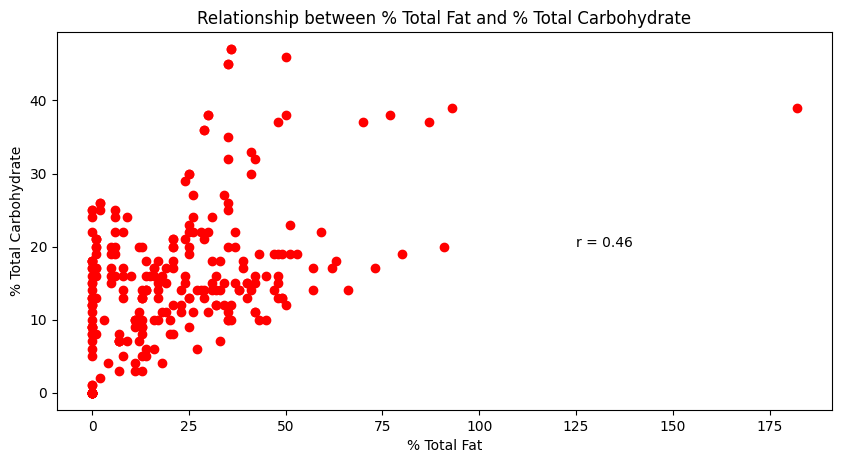

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(menu['Total Fat (% Daily Value)'], menu['Carbohydrates (% Daily Value)'], color='red')
correlation = menu['Total Fat (% Daily Value)'].corr(menu['Carbohydrates (% Daily Value)'])
plt.text(125,20,'r = {}'.format(round(correlation,2)))
plt.xlabel("% Total Fat")
plt.ylabel("% Total Carbohydrate")
plt.title("Relationship between % Total Fat and % Total Carbohydrate")
plt.show()

Vidimo da u prosjeku Mcdonald's hrana ima niski udio ugljikohidrata. Također, postoji slab odnos između ugljikohidrata i masti u namirnicama.

####Ugljikohidrati

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima ugljikohidrata
menu['Carbohydrates'].mean()

47.34615384615385

In [ ]:
menu.groupby('Category')['Carbohydrates (% Daily Value)'].mean()

Category
Beef & Pork           13.466667
Beverages              9.592593
Breakfast             16.571429
Chicken & Fish        16.333333
Coffee & Tea          14.863158
Desserts              11.571429
Salads                 7.166667
Smoothies & Shakes    30.142857
Snacks & Sides         9.615385
Name: Carbohydrates (% Daily Value), dtype: float64

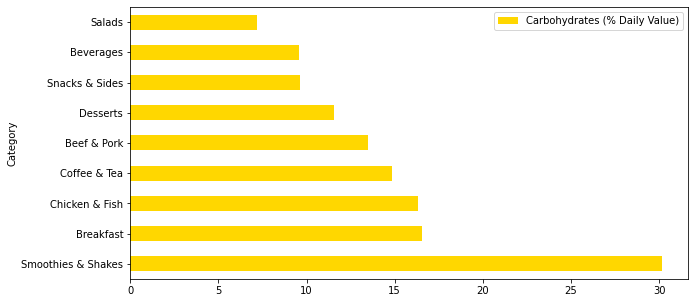

In [ ]:
#Koje kategorije imaju najviše ugljikohidrata
menu[ ['Category', 'Carbohydrates (% Daily Value)'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Carbohydrates (% Daily Value)', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Carbohydrates (% Daily Value)': 'Carbohydrates (% Daily Value)'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5), color='gold')

Kategorija 'Smoothies & Shakes' sadrži najviše ugljikohidrata.

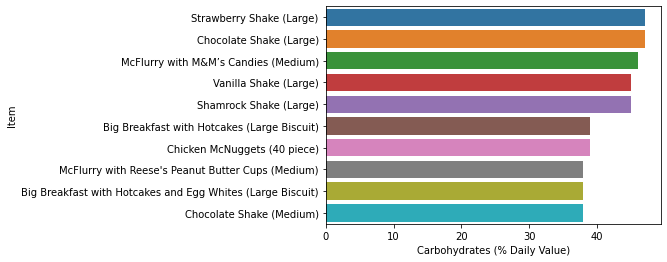

In [ ]:
#Koji artikli imaju najviše ugljikohidrata
data_carbo = menu.sort_values(by = ['Carbohydrates (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Carbohydrates (% Daily Value)', data = data_carbo.head(10))

Još jedna potvrda da kategorija 'Smoothies & Shakes' sadrži i artikle sa najviše kalorija.

Ako se optimalno može pojesti od 260 grama ugljikohidrata dnevno, ovdje je dan prikaz sve hrane koja ima poviše 260 g ugljikohidrata:

In [ ]:
menu[menu['Carbohydrates'] > 260 ].head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),category,saturated_cholesterol


Kao što vidimo, ni jedan artikal ne spada u tu kategoriju. Rezultat tome smo već prethodno pokazali i zaključili da McDonald's hrana ne sadrži puno ugljikohidrata.

####Natrij

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima natrija
menu['Sodium (% Daily Value)'].mean()

20.676923076923078

In [ ]:
menu.groupby('Category')['Sodium (% Daily Value)'].mean()

Category
Beef & Pork           42.466667
Beverages              1.740741
Breakfast             50.500000
Chicken & Fish        52.333333
Coffee & Tea           5.726316
Desserts               5.000000
Salads                24.500000
Smoothies & Shakes     7.785714
Snacks & Sides        16.461538
Name: Sodium (% Daily Value), dtype: float64

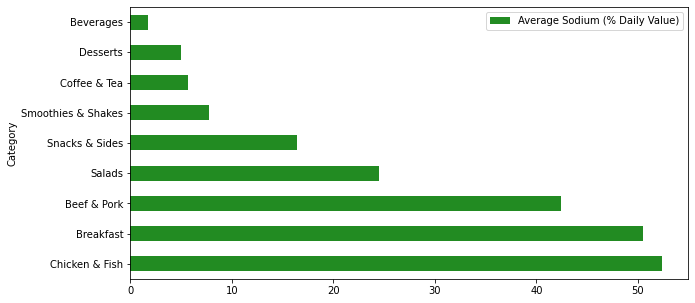

In [ ]:
#Koje kategorije imaju najviše natrija
menu[ ['Category', 'Sodium (% Daily Value)'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Sodium (% Daily Value)', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Sodium (% Daily Value)': 'Average Sodium (% Daily Value)'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5), color='forestgreen')

Najveće količine natrija ima kategorija 'Chicken & Fish', međutim odmah mu je u korak i kategorija 'Breakfast'.

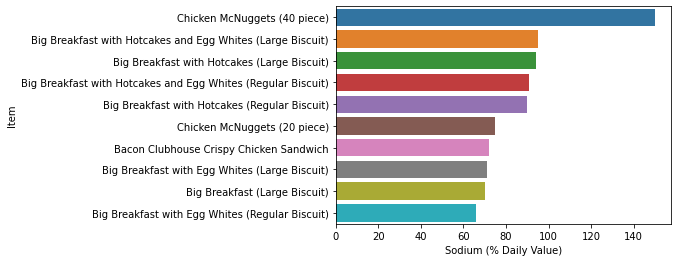

In [ ]:
#Koji artikli imaju najviše natrija
data_sodium = menu.sort_values(by = ['Sodium (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Sodium (% Daily Value)', data = data_sodium.head(10))

Kako je Chicken McNuggets (40) artikal koji sadrži znantno više natrija od ostatka, moguće da tim i podiže prosjek cijele kategorije 'Chicken & Fish'. Prosjek je općenito osjetljiv na ekstremne vrijednosti, što je upravo vidljivo ovdje. Zapravo možemo uočiti da je ostatak artikala iz kategorije 'Breakfast', te da bi upravo ta kategorija mogla biti vodeća po broju artikala s najviše natrija.

Ako se optimalno može pojesti od 6 grama natrija dnevno, ovdje je dan prikaz sve hrane koja ima poviše 6 g natrija:

In [ ]:
menu[menu['Sodium'] > 6 ].head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),category,saturated_cholesterol
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0.0,1.923077
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0.0,12.000000
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0.0,17.777778
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0.0,3.508772
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0.0,16.000000


####Dodatno
>Prethodno je navedeno dosta ograničenja i mogućih negativnih učinaka pa se posljednje osvrćemo i na nekoliko pozitivnih strana

######Vitamini

Vitamin A je esencijalni vitamin jer štiti oči i smanjuje rizik od bolesti podržavajući imunološki sustav.

Vitamin C također je bitan vitamin koristan za jačanje imuniteta i kontrolu visokog krvnog tlaka.

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima vitamina A po kategorijama
vitaminA= menu.groupby('Category')['Vitamin A (% Daily Value)'].mean()
vitaminA

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima vitamina C po kategorijama
vitaminC= menu.groupby('Category')['Vitamin C (% Daily Value)'].mean()
vitaminC

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

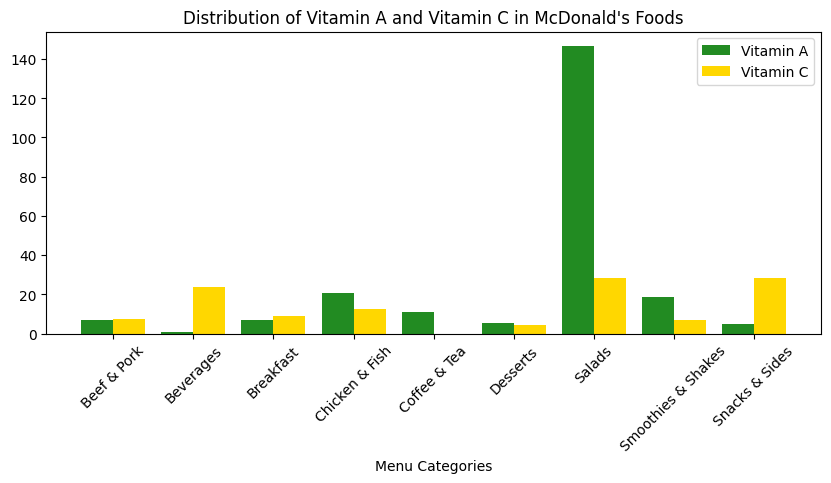

In [ ]:
#Koje kategorije imaju najviše vitamina A i C
plt.figure(figsize=(10, 4), dpi=100)

category = vitaminA.index
Iron = vitaminA.values
Calcium = vitaminC.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Vitamin A', color = 'forestgreen')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Vitamin C', color = 'gold')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Vitamin A and Vitamin C in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Od svih kategorija hrane, kategorija 'Salads' ima najveću količinu vitamina A, a slijede je 'Chicken & Fish' i 'Smoothies & Shakes'.
U odnosu na to, hrana najbogatija vitaminom C nalazi se u kategorijama 'Beverages', 'Salads', 'Snacks & Sides'.

Kao što vidimo, McDonald's-ova hrana je bogatija vitaminom A nego vitaminom C.

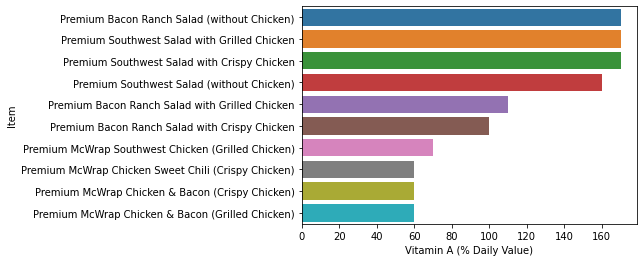

In [ ]:
#Koji artikli imaju najviše vitamina A
data_vitaminA = menu.sort_values(by = ['Vitamin A (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Vitamin A (% Daily Value)', data = data_vitaminA.head(10))

Potvrda na gornji graf da je kategorija 'Salads' najbogatija vitaminom A.

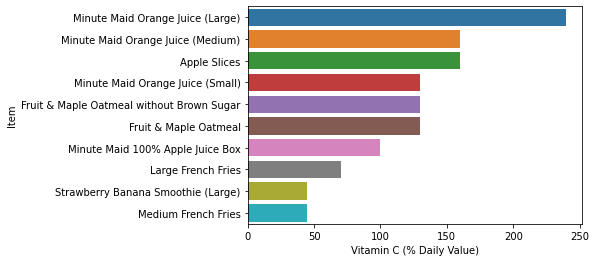

In [ ]:
#Koji artikli imaju najviše vitamina C
data_vitaminC = menu.sort_values(by = ['Vitamin C (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Vitamin C (% Daily Value)', data = data_vitaminC.head(10))

Za kategoriju 'Baverages', s izuzetkom sokova od jabuke i naranče koji su najbogati vitaminom C, za sva ostala pića pretpostavlja se da imaju (npr. Coca-Cola, Sprite) vrlo malo vitamina. Kriške jabuke imaju najveću količinu vitamina C u kategoriji 'Snacks & Sides'. Zanimljivo je vidjeti pomfrit i vitamin C. Razlog bi mogao biti to da je krumpir bogati izvor vitamina C.


In [ ]:
beverage = menu[menu.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute

Prethodno spomenuta pretpostavka o pićima, potvrđuje se ovdje.

######Željezo i Kalcij

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima željeza po kategorijama
iron = menu.groupby('Category')['Iron (% Daily Value)'].mean()
iron

Category
Beef & Pork           23.333333
Beverages              0.296296
Breakfast             17.142857
Chicken & Fish        16.370370
Coffee & Tea           2.147368
Desserts               4.000000
Salads                10.333333
Smoothies & Shakes     3.964286
Snacks & Sides         6.615385
Name: Iron (% Daily Value), dtype: float64

In [ ]:
#Koliko u prosjeku hrana s jelovnika ima kalcija po kategorijama
calcium = menu.groupby('Category')['Calcium (% Daily Value)'].mean()
calcium

Category
Beef & Pork           23.000000
Beverages              2.962963
Breakfast             16.166667
Chicken & Fish        15.444444
Coffee & Tea          28.294737
Desserts              11.428571
Salads                15.000000
Smoothies & Shakes    35.571429
Snacks & Sides         6.000000
Name: Calcium (% Daily Value), dtype: float64

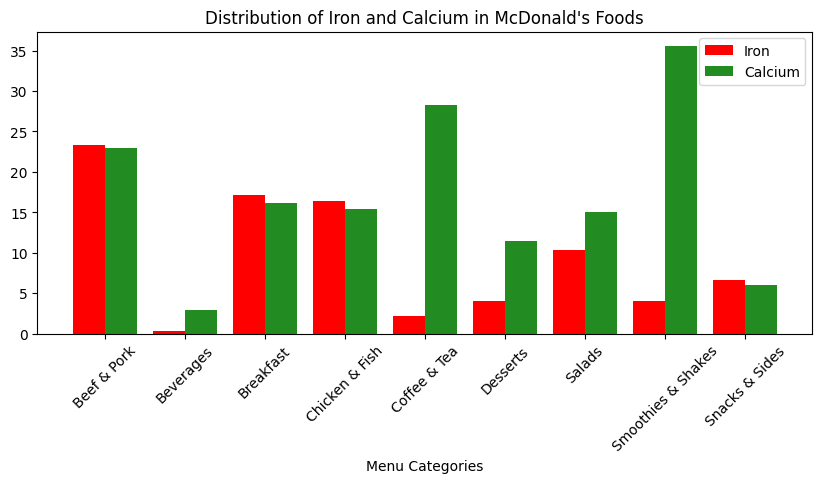

In [ ]:
#Koje kategorije imaju najviše kalcija i željeza
plt.figure(figsize=(10, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'red')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'forestgreen')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Vidimo da kategorija 'Beef & Pork' sadrži najviše željeza. Slijedi im 'Breakfast' i 'Chicken & Fish'.

Najviše kalcija možemo pronaći u kategoriji 'Smoothies & Shakes' te 'Coffee & Tea'. Bogati su kalcijem, ali nešto siromašniji željezom.

Zanimljivo je primjetiti da se u prosjeku veći udio kalcija i željeza nalazi u kategorijama 'Beef & Pork' i 'Chicken & Fish'. Razlog bi mogli gledati u tom da se radi o 'životinjskim proteinima' za koje se zna da su bogati tim vrijednostima.


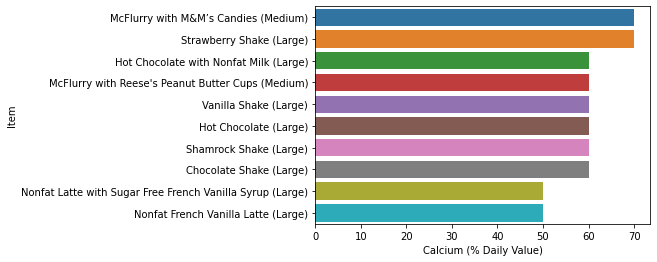

In [ ]:
#Koji artikli imaju najviše kalcija
data_cal = menu.sort_values(by = ['Calcium (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Calcium (% Daily Value)', data = data_cal.head(10))

Još jednom vidimo jasan prikaz da je kategorija 'Smoothies & Shakes' najbogatija kalcijem.

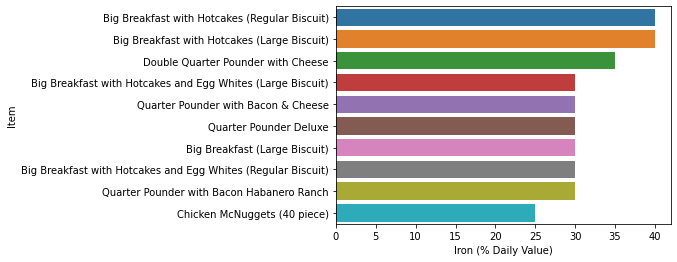

In [ ]:
#Koji artikli imaju najviše željeza
data_iron = menu.sort_values(by = ['Iron (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x='Iron (% Daily Value)', data = data_iron.head(10))

Uz artikle koje možemo pronaći unutar kategorije 'Beef & Pork' kao najbogatije željezom, vidimo da se većina artikala iz kategorije 'Breakfast' nalazi upravo pri samom vrhu artikala koji sadrže najviše željeza.

####Ovisnost nutritivnih vrijednosti

>Dijagram raspršenosti prikazuje odnos između dviju kvantitativnih varijabli izmjerenih za iste pojedince. Vrijednosti jedne varijable prikazuju se na vodoravnoj osi, a vrijednosti druge varijable na okomitoj osi. Svaki pojedinac u podacima pojavljuje se kao točka na grafikonu. Uzorak točaka na dijagramu raspršenosti omogućuje nam da odredimo postoji li odnos ili korelacija između dviju kontinuiranih varijabli. Ako odnos postoji, dijagram raspršenosti pokazuje njegov smjer i radi li se o linearnom ili zakrivljenom odnosu.
Možemo vidjeti da postoje različiti parametri s jakom korelacijom između njih. Nacrtajmo te snažne odnose pojedinačno.


**ČITANJE GRAFA**:
Što su podatkovne točke bliže oblikovanju ravne crte kada se iscrtavaju, to je veća korelacija između dviju varijabli ili jači odnos. Ako podatkovne točke čine ravnu liniju koja ide od blizu ishodišta do visokih y-vrijednosti, kaže se da varijable imaju pozitivnu korelaciju. Postoje 4 načuna čitanja ovog grafa.

1.   Forma - Je li linearan ili nelinearan?

2.   Smjer - Je li pozitivan ili negativan?
3.   Povezanost - Jesu li točke povezane slabo, srednje ili jako?


4.   Outlayer - Postoje li?


Text(0, 0.5, 'Total Fat')

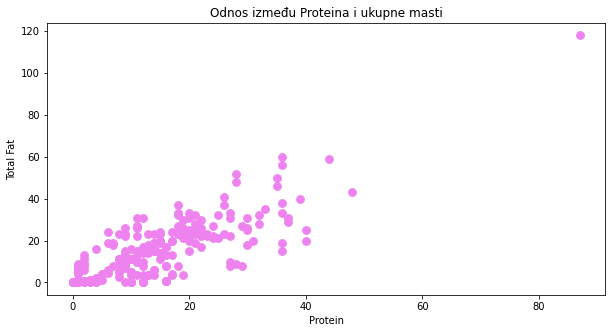

In [ ]:
#Protein i ukupna mast

plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Protein", y='Total Fat', data=menu, color='violet', s=60)
plt.title('Odnos između Proteina i ukupne masti')
plt.xlabel('Protein')
plt.ylabel('Total Fat')


Ovaj graf nam prikazuje linearnu formu, umjereno pozitivan smjer, umjereno jaku povezanost i postojanje outlayera.

Protein se može ponašati kao masnoća u određenim fiziološkim uvjetima. Prejedanje će uzrokovati pretvaranje dodatnih aminokiselina (iz mišića) koje će se pohraniti kao mast. Kraće rečeno, konzumiranje prekomjernih količina proteina može se pretvoriti u mast.
PS. Konzumiranje prekomjerne količine proteina bez vježbanja neće izgraditi mišiće :)

Text(0, 0.5, 'Kalorije')

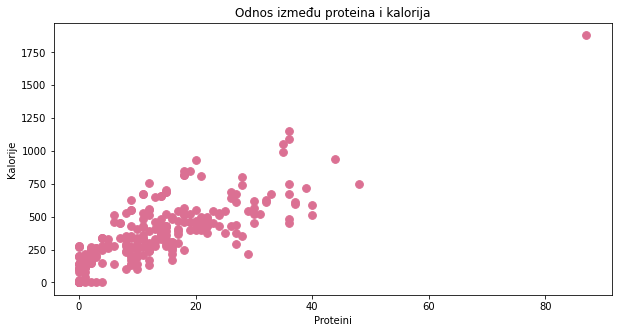

In [ ]:
#Proteini i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Protein", y='Calories', data=menu, color='palevioletred', s=60)
plt.title('Odnos između proteina i kalorija')
plt.xlabel('Proteini')
plt.ylabel('Kalorije')

Ovaj graf nam prikazuje linearnu formu , umjereno pozitivan smjer, umjereno jaku povezanost i postojanje outlayera.


Proteini sadrže kalorije (4 po gramu). Veći unos proteina ekvivalentno tome povećava i ukupni unos kalorija. Međutim, zamjenom hrane s praznim kalorijama poput šećera, rafiniranih žitarica , nemasnom visokoproteinskom hranom, možete povečati proteine u svojoj prehrani bez povećanja kalorija.



Text(0, 0.5, 'Kalorije')

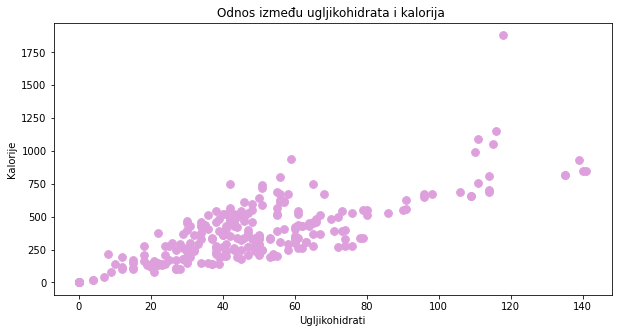

In [ ]:
#Ugljikohidrati i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Carbohydrates", y='Calories', data=menu, color='plum', s=60)
plt.title('Odnos između ugljikohidrata i kalorija ')
plt.xlabel('Ugljikohidrati')
plt.ylabel('Kalorije')

Ovaj graf nam prikazuje linearnu formu, umjereno pozitivan smjer, umjereno jaku povezanost i postojanje outlayera.

Jedan gram ugljikohidtrata sadrži 4 grama kalorija. Hrana koja sadrži cjelovite žitarice i puno ugljikohidrata bogata je kalorijama, a također sadrži potrebne hranjive tvari i minerale za zdravo tijelo. Najbolja hrana od cjelovitih žitarica s visokim sadržajem kalorija uključuje kruh, smeđu rižu i tjesteninu od cjelovitih žitarica. Naše tijelo treba velike količine ugljikohidrata za opskrbu energijom u obliku kalorija. Budući da ugljikohidrati unose kalorije u našu prehranu, moramo slijediti određene prehrambene smjernice kako bi bili sigurni da unosimo dovoljno, bez pretjerivanja.

Text(0, 0.5, 'Kalorije')

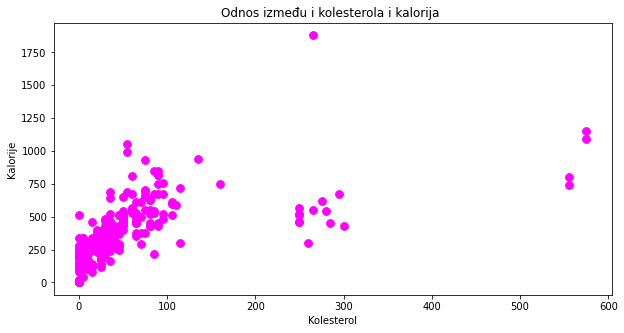

In [ ]:
#Kolestrol i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Cholesterol", y='Calories', data=menu, color='fuchsia', s=60)
plt.title('Odnos između i kolesterola i kalorija ')
plt.xlabel('Kolesterol')
plt.ylabel('Kalorije')

Ovo je nelinearna korelacija (forma).


Kolesterol je dio stanične membrane, sudjeluje u metaboličkim procesima u izmjeni tvari, služi za sintezu hormona kore nadbubrežne žlijezde i spolnih hormona, te vitamina topivih u mastima kao i za sintezu vitamina D, prekursor je žučnih kiselina koje služe u probavi i apsorpciji masti. Ako su vrijednosti kolesterola povišene postaju rizični čimbenik za razvoj kardiovaskularnih bolesti. Kalorije ne utječu na povećanje kolesterola, samo zasićene masti.

Text(0, 0.5, 'Kalorije')

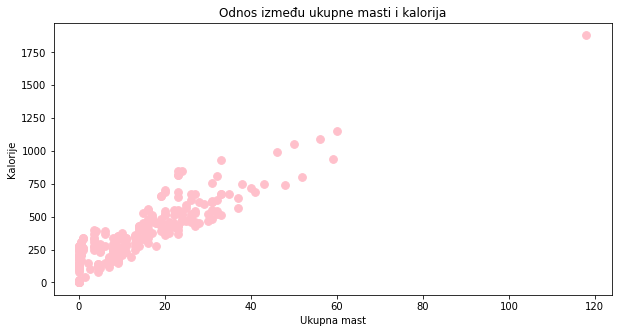

In [ ]:
#Masti i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Total Fat", y='Calories', data=menu, color='pink', s=60)
plt.title('Odnos između ukupne masti i kalorija')
plt.xlabel('Ukupna mast')
plt.ylabel('Kalorije')

Ovaj graf nam prikazuje linearnu formu, pozitivan smjer, umjereno jaku povezanost i postojanje outlayera.

Masti imaju dvostruko veću vrijednost kalorija nego proteini i ugljikohidrati što smo do sada mogli vidjeti. Gram masti ima oko 9 kalorija.

Text(0, 0.5, 'Kalorije')

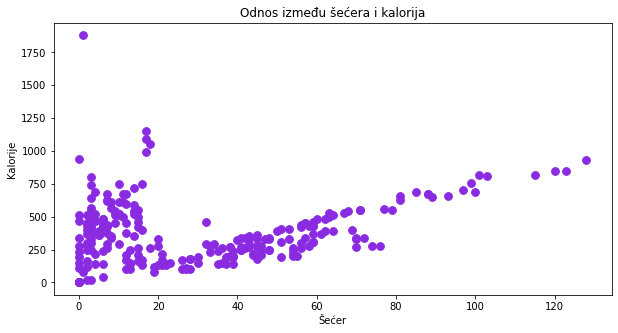

In [ ]:
#Šećeri i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Sugars", y='Calories', data=menu, color='blueviolet', s=60)
plt.title('Odnos između šećera i kalorija')
plt.xlabel('Šećer')
plt.ylabel('Kalorije')

Ovaj graf nam prikazuje linearnu formu, umjreno pozitivnan smjer, umjereno jaku povezanost i postojanje outlayera.

Šećer je jednostavan ugljikohidrat. Sadrži 4 grama kalorija. Povećavanje šećera rezultira i povećavanju kalorija, ali postoje i neki izuzetci te je moguće jesti niskokalorični proizvod s visokim udjelom šećera.

Text(0, 0.5, 'Kalorije')

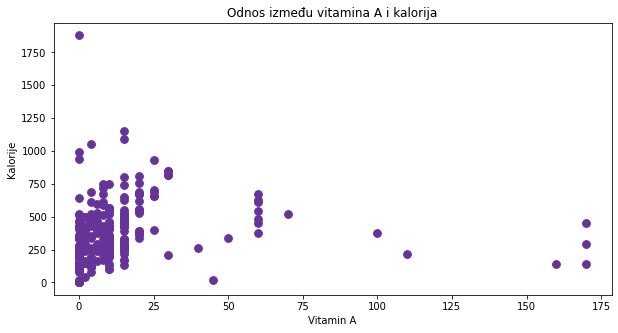

In [ ]:
#Vitamin A i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Vitamin A (% Daily Value)", y='Calories', data=menu, color='rebeccapurple', s=60)
plt.title('Odnos između vitamina A i kalorija')
plt.xlabel('Vitamin A')
plt.ylabel('Kalorije')


Vitamin A ne sadrži nikakve kalorije.

Text(0, 0.5, 'Kalorije')

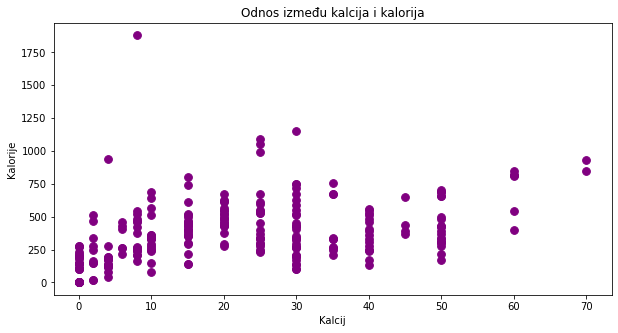

In [ ]:
# Kalcij i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Calcium (% Daily Value)", y='Calories', data=menu, color='purple', s=60)
plt.title('Odnos između kalcija i kalorija')
plt.xlabel('Kalcij')
plt.ylabel('Kalorije')

Kalcij ne sadrži kalorije.

Text(0, 0.5, 'Kalorije')

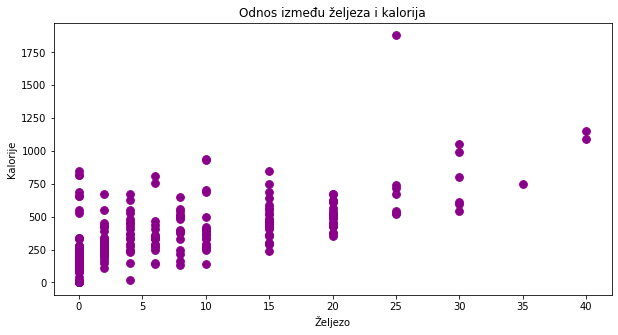

In [ ]:
# Željezo i kalorije
plt.figure(figsize=(10, 5))
plot=plt.scatter(x="Iron (% Daily Value)", y='Calories', data=menu, color='darkmagenta', s=60)
plt.title('Odnos između željeza i kalorija')
plt.xlabel('Željezo')
plt.ylabel('Kalorije')

Željezo ne sadrži kalorije.

####Korelacija

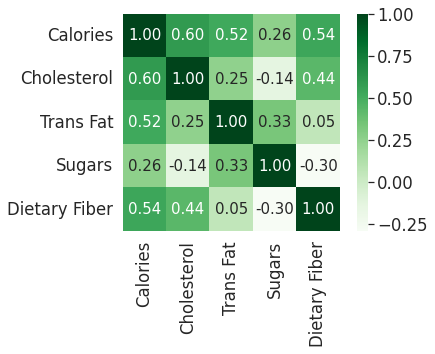

In [ ]:
cols = ['Calories','Cholesterol','Trans Fat','Sugars','Dietary Fiber']
cm = np.corrcoef(menu[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols, cmap='Greens')

Kao što smo vidjeli u gore prikazanim grafovima, ova korelacijska matrica je samo potvrdila ideju da trans masti i kolesterol treba izbjegavati. Ne samo da su nezdravi već i povećavaju kalorijski unos. Iz matrice vidimo da negativnu korelaciju imaju: šećeri i vlakna te šećer i kolesterol.
Jaku pozitivnu korelaciju imaju : kalorije i kolesterol, kalorije i vlakna, kalorije i trans masti.
Pozitivnu korelaciju imaju: kolesterol i vlakna, trans mast i vlakna, šećer i kalorije, šećeri i trans masti te trans mast i kolesterol.
Objašnjenje : Budući da postoji velika pozitivna korelacija između kolesterola i kalorija možemo zaključiti da bi ga trebali izbjegavati. Dijagonala je tzv. savršena korelacija jer prikazuje korelaciju svake varijable sa samom sobom.

####Linearna regresija


>Uloga regresije je razumjeti odnos između kritičnih nezavisnih varijabli koje utječu na zavisnu varijablu.

U našem slučaju govorimo upravo o jednostavnoj linearnoj regresiji, gdje jedna nezavisna varijabla ('Total Fat') objašnjava ponašanje zavisne varijable ('Calories'). Cilj je pronaći liniju koja najbolje pristaje kroz skup podatkovnih točaka. Naša tražena linija opisana je jednadžbom oblika y = mx + b, gdje je y zavisna varijabla 'Calories', x nezavisna varijabla 'Total Fat', m je nagib linije ili Coefficient, a b je y-odsjecište ili Intercept.

In [ ]:
#Izvučene vrijednosti iz dva stupca od interesa, 'Total Fat' i 'Calories' (zavisna i nezavisna varijabla)
fat_values = menu['Total Fat'].values
calorie_values = menu['Calories'].values

Text(0, 0.5, 'Calorie values')

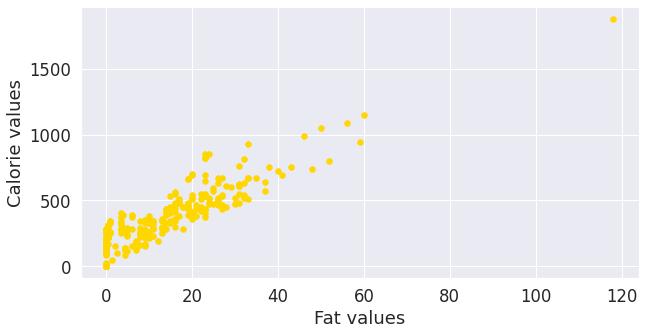

In [ ]:
#Dijagram raspršenosti za vrijednosti kako bi se pokazao njihov međusobni odnos
plt.figure(figsize=(10, 5))
plt.scatter(fat_values, calorie_values, color='gold', s=30)
plt.xlabel('Fat values')
plt.ylabel('Calorie values')

In [ ]:
#Vektor stupca za fat_values
fat_vector = fat_values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Splits na train and test
x_train, x_test, y_train, y_test = train_test_split(fat_vector, calorie_values, train_size=.9, test_size=.1)
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (234, 1)
y_train shape: (234,)
X_test shape: (26, 1)
y_test shape: (26,)


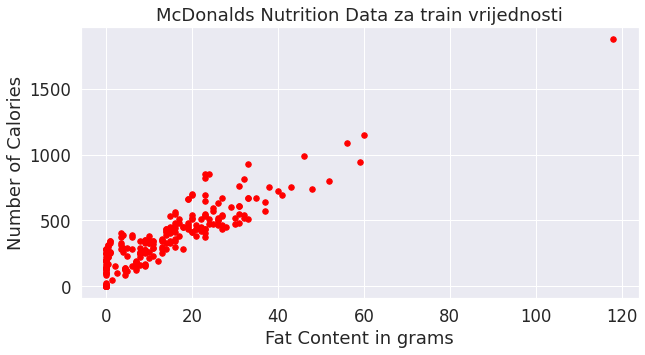

In [ ]:
#Iscrtavanje podatkovnih točaka za train podatke
plt.figure(figsize=(10, 5))
plt.scatter(x_train,y_train,color='red', s=30)
plt.xlabel('Fat Content in grams')
plt.ylabel('Number of Calories')
plt.title('McDonalds Nutrition Data za train vrijednosti')
plt.show()

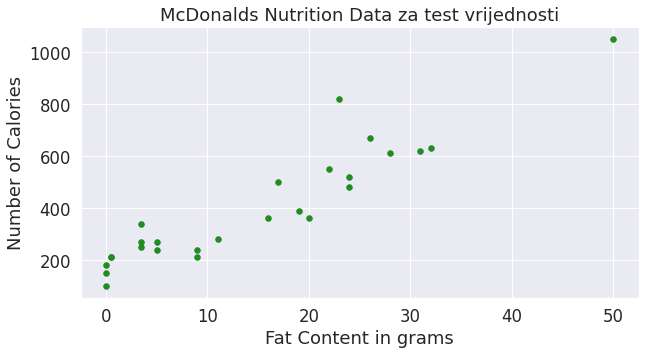

In [ ]:
#Iscrtavanje podatkovnih točaka za test podatke
plt.figure(figsize=(10, 5))
plt.scatter(x_test,y_test,color='forestgreen', s=30)
plt.xlabel('Fat Content in grams')
plt.ylabel('Number of Calories')
plt.title('McDonalds Nutrition Data za test vrijednosti')
plt.show()

In [ ]:
#Regresijski model
lm = LinearRegression()
lm.fit(x_train, y_train) #Koristimo metodu fit() za obuku modela na podacima za obuku
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")

Train accuracy 81.53 %
Test accuracy 83.83 %


In [ ]:
#Intercept (odsjecište na y-osi) i Coefficients (nagib)
print("Coefficients: ",lm.coef_)
print("Intercept: ",lm.intercept_)

Coefficients:  [15.18617061]
Intercept:  150.07711075315348


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

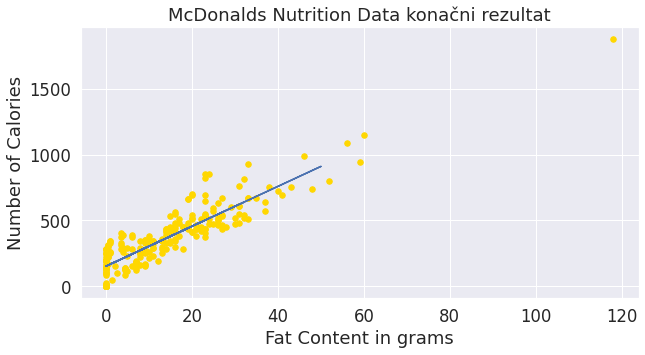

In [ ]:
#Dodaje training split vrijednosti u regresijski model
#Vizualizacija rezultata iscrtavanjem ispitnih podatkovnih točaka i predviđene linije
plt.figure(figsize=(10, 5))
plt.scatter(x_train,y_train,color='gold', s=30)
plt.plot(x_test,y_predict)
plt.xlabel('Fat Content in grams')
plt.ylabel('Number of Calories')
plt.title('McDonalds Nutrition Data konačni rezultat')
plt.plot

#**4. Zaključak**
> Iii... na kraju smo!


Svima nam je jako teško zamisliti restoran brze hrane kao što je McDonald's u zdravom smislu, ali analizirajuću nutritivne vrijednosti artikala više su nego iznenađujuće. Bez obzira kakav plan prehrane slijedimo, zdrave namirnice McDonald's-a ipak nam mogu biti izvrstan izbor ako smo u pokretu ili želimo nešto zgrabiti na brzinu.

Kao pozitivne strane mogle bismo istaknuti da većina McDonald's hrane ima malo ugljikohidrata s malo ili nimalo trans-masti, što je zaista veliki plus. Također, dosta artikala je bogato vitaminima (vitamin A i C), posebno salate, a zatim i side snacks. Analizom esencijalnih minerala kao što su kalcij i željezo, primijećeno da su to artikli u jelovniku koji sadrže mlijeko ili životinjske bjelančevine vrlo bogate kalcijem. 'Beef & Pork', 'Shoothies & Shakes', Coffee & Tea' samo su neke od tih kategorija. Željezo isto pronalazimo najviše među artiklima spomenutih kategorija.


Međutim, puno je namirnica bogato zasićenim masnoćama, stoga je važno dobro pogledati koja hrana ima niski udio zasićenih masnoća u slučaju da smanjujemo unos masti. To su naprimjer artikli koji spadaju pod kategorije pića, snacksa i salati. Kroz analizu, često spomenuti 'Chicken McNuggets (40 komada)' sadrži velike količine kalorija (1880 kcal), natrija (3600 miligrama), proteina (87 grama) i ukupne masti (118 grama). S obzirom na proječne vrijednosti za dnevni unos kojima smo se vodili kroz istraživanje, ove vrijednosti su zaista velike. Također, nailazimo na artikale koji imaju visok sadržaj natrija, zasićenih masti, dodanog šećera ili kolesterola. Naravno, negativne strane su očekivane isto kao i pozitivne. Važan je balans.

Zanimljivo je još istaknuti da promatrajući određene vrijednosti, McDonald’s zapravo nudi nekoliko obroka koji se mogu uključiti u mnogo različitih obrazaca prehrane, uključujući vegetarijansku, ketogenu, niskokaloričnu dijetu ili dijetu s niskim udjelom natrija.

Jesmo li pronašle healthy combo? Itekako jesmo! :)

Analiza McDonald's jelovnika pružila nam je pregled nutritivnih vrijednosti svake kategorije hrane na popisu. Na temelju ove analize mi i vi možemo odlučiti koju hranu odabrati ovisno o svojim preferencijama ili prehrambenim potrebama.

Dobar tek!


####Primjer zdravog jelovnika

U nastavku je primjer jednog svakodnevnog zdravog jelovnika koji bismo sebi mogli omogućiti uz predržavanje svih nutritivnih vrijednosti. Rezultat jelovnika dobiven je također uz pomoć linearne optimizacije.

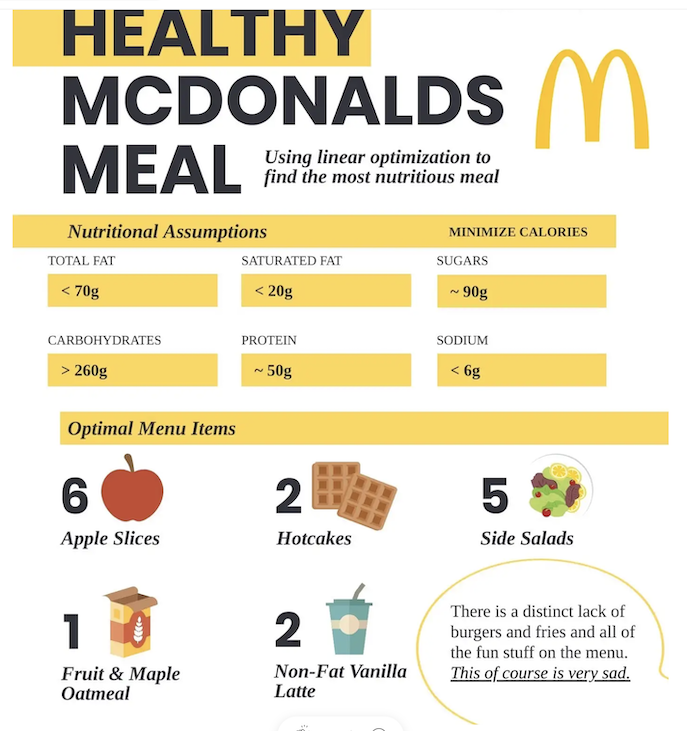